In [2]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
import re
from sklearn.cluster import DBSCAN
import string
import unicodedata
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from spellchecker import SpellChecker
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
# loading the dataset
train=pd.read_csv("quora.csv")

In [4]:
train.head()

,question,Unnamed: 1
0,What is the step by step guide to invest in sh...,NaN
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,NaN
2,How can I increase the speed of my internet co...,NaN
3,Why am I mentally very lonely? How can I solve...,NaN
4,"Which one dissolve in water quikly sugar, salt...",NaN


In [5]:
train["question"].head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
Name: question, dtype: object

In [6]:
#convert each question to a list of string
data = pd.Series(train["question"].tolist()).astype(str)

In [7]:
data = data[:500]

## Text Preprocessing

In [8]:
class text_preprocessing:
    
    def __init__(self,data ):
        self.data = data
    
    def cleanhtml(self, data):    
        """ Remove any html code in the text """
        self.data = data 
        cleanr = re.compile('<.*?>')
        clean_data = re.sub(cleanr, '', data)
        return clean_data

    def tokenize_(self, data):
        """Tokenize each sentence """
        self.data = data 
        tokenized_list = []
        for d in data:
            word = nltk.word_tokenize(d)
            tokenized_list.append(word)
        return tokenized_list

    def remove_non_ascii(self, tokenized_list):
        """Remove non-ASCII characters from list of tokenized words"""
        self.tokenized_list = tokenized_list
        cleaned_list = []
        for word in tokenized_list:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            cleaned_list.append(new_word)
        return cleaned_list

    def to_lowercase(self, tokenized_list):
        """Convert all characters to lowercase from list of tokenized words"""
        self.tokenized_list = tokenized_list
        cleaned_list = []
        for word in tokenized_list:
            new_word = word.lower()
            cleaned_list.append(new_word)
        return cleaned_list

    def remove_punctuation(self, tokenized_list):
        """Remove punctuation from list of tokenized words"""
        self.tokenized_list = tokenized_list
        cleaned_list = []
        for word in tokenized_list:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                cleaned_list.append(new_word)
        return cleaned_list

    def remove_stopwords(self, tokenized_list):
        """Remove stop words from list of tokenized words"""
        self.tokenized_list = tokenized_list
        cleaned_list = []
        for word in tokenized_list:
            if word not in stopwords.words('english'):
                cleaned_list.append(word)
        return cleaned_list

    def stem_words(self, tokenized_list):
        """Stem words in list of tokenized words"""
        self.tokenized_list = tokenized_list
        stemmer = LancasterStemmer()
        stems = []
        for word in tokenized_list:
            stem = stemmer.stem(word)
            stems.append(stem)
        return stems

    def lemmatize_verbs(self, tokenized_list):
        """Lemmatize verbs in list of tokenized words"""
        self.tokenized_list = tokenized_list
        lemmatizer = WordNetLemmatizer()
        lemmas = []
        for word in tokenized_list:
            lemma = lemmatizer.lemmatize(word, pos='v')
            lemmas.append(lemma)
        return lemmas
    
    def remove_digits(self, word_list): 
        """ Function to remove digits from each question"""
        self.word_list = word_list
        words = []
        word_list =[i for i in word_list if  (i >= 'a' and i <= 'z') ] 
        return word_list
    
    def spell_check(self, word_list):
        """ Function to autocorrect each word in question"""
        self.word_list = word_list
        spell = SpellChecker()
        words = []
        word_list = [spell.correction(i) for i in word_list]
        return word_list

    def normalize(self, data):
        """Run all the functions for preprocessing in a pipeline"""
        self.data = data 
        clean_data = map(self.cleanhtml,data)
        tokenized_list = self.tokenize_(clean_data)
        normalized_data = []
        for i in tokenized_list:
            cleaned_list = self.remove_non_ascii(i)
            cleaned_list = self.to_lowercase(cleaned_list)
            cleaned_list = self.remove_punctuation(cleaned_list)
            cleaned_list = self.remove_stopwords(cleaned_list)
            cleaned_list = self.lemmatize_verbs(cleaned_list)
            cleaned_list = self.remove_digits(cleaned_list)
            cleaned_list = self.spell_check(cleaned_list)
            normalized_data.append(cleaned_list)
        return normalized_data


In [9]:
# Preprocess the text data
tp = text_preprocessing(data)
normalized_data = tp.normalize(data)

In [10]:
# Data after prerocessing
normalized_data 

[['step', 'step', 'guide', 'invest', 'share', 'market', 'india'],
 ['story', 'kohinoor', 'kohinoor', 'diamond'],
 ['increase', 'speed', 'internet', 'connection', 'use', 'vpn'],
 ['mentally', 'lonely', 'solve'],
 ['one',
  'dissolve',
  'water',
  'quickly',
  'sugar',
  'salt',
  'methane',
  'carbon',
  'di',
  'oxide'],
 ['astrology', 'capricorn', 'sun', 'cap', 'moon', 'cap', 'rise', 'say'],
 ['buy', 'iago'],
 ['good', 'geologist'],
 ['use', 'instead'],
 ['motorola', 'company', 'hack', 'charter', 'motorola', 'dcx3400'],
 ['method', 'find', 'separation', 'slit', 'use', 'prestel', 'baptism'],
 ['read', 'find', 'couture', 'comment'],
 ['make', 'physics', 'easy', 'learn'],
 ['first', 'sexual', 'experience', 'like'],
 ['laws',
  'change',
  'status',
  'student',
  'visa',
  'green',
  'card',
  'us',
  'compare',
  'immigration',
  'laws',
  'canada'],
 ['would',
  'trump',
  'presidency',
  'mean',
  'current',
  'international',
  'master',
  'students',
  'f1',
  'visa'],
 ['manipulat

In [11]:
# function to form sentences from token
sentence = []
sentences = []


def token_2_sentence(normalized_data):
    """Join the tokens in each list with space to form a sentence"""
    for i in normalized_data:
      sentence = " ".join(i)
      sentences.append(sentence)
      sentence = [] 
    return sentences
    
sentences_list = token_2_sentence(normalized_data)
    

In [12]:
sentences_list[:10]

['step step guide invest share market india',
 'story kohinoor kohinoor diamond',
 'increase speed internet connection use vpn',
 'mentally lonely solve',
 'one dissolve water quickly sugar salt methane carbon di oxide',
 'astrology capricorn sun cap moon cap rise say',
 'buy iago',
 'good geologist',
 'use instead',
 'motorola company hack charter motorola dcx3400']

## DBSCAN with TFIDF

In [13]:
# TFIDF and DBSCAN
class tfidf_dbscan:
    
    def calc_tfidf(self, sentences_list,min_df, max_df ):
        """ Function to calculate tfidf score """
        self.sentences_list = sentences_list
        # Find tfidf score for every sentence in the dataset
        vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df = min_df, max_df = max_df, decode_error = "ignore") # considers upto 5 ngrams
        X = vectorizer.fit_transform(sentences_list).toarray() # toarray converts sparse matrix to dense array
        print("Number of features",len(vectorizer.get_feature_names())) # length of features
        print("Features",vectorizer.get_feature_names()) # display the feature words  which can be changed by adjusting the value of min_df and max_df
        return X

    def dbscan(self, X, eps, min_samples):
        """ Function to form clusters using  DBSCAN algorithm"""
        eps = 0.0045 # how close points should be to each other to be considered a part of a cluster 
        min_samples = 3 # the minimum number of points to form a dense region  
        dbscan = DBSCAN( eps=eps, min_samples=min_samples ) 
        dbscan_model = dbscan.fit(X)
        return dbscan_model
        
    def form_cluster(self,dbscan_model):
        """ Function to form clusters """
        self.dbscan_model = dbscan_model
        core_samples_mask = np.zeros_like(dbscan_model.labels_, dtype=bool)
        core_samples_mask[dbscan_model.core_sample_indices_] = True
        labels1 = dbscan_model.labels_
        n_clusters_ = len(set(labels1)) - (1 if -1 in labels1 else 0) # Number of clusters in labels
        print("Cluster Labels",labels1)
        print()
        print("Number of clusters",n_clusters_) # number of clusters
        return labels1

    def display_clusters(self, labels1):
        """Function to display clsuters"""
        self.labels1= labels1
        clusters1 = {} # a dictionary for different cluster 
        for c, i in enumerate(labels1):
            if i == -1:
                continue
            elif i in clusters1:
                clusters1[i].append( sentences[c] )
            else:
                clusters1[i] = [sentences[c]]
        for c in clusters1: # print the different clusters
            print("Cluster No."+" "+str(c)+" "+str(clusters1[c]))
            print()


    def main(self, sentences_list):
        """Main function : find finds tfidf score then forms clusters using DBSCAN algorithm """
        self.sentences_list = sentences_list
        X = self.calc_tfidf(sentences_list, 0.001,300)
        dbscan_model = self.dbscan(X,0.005,3)
        labels = self.form_cluster(dbscan_model)
        self.display_clusters(labels)
        
    

In [16]:
# Display the features, Cluster Labels, Number of Clusters and different Clusters
td = tfidf_dbscan()
td.main(sentences_list)

Number of features 3470
Features ['abide', 'abide death', 'able', 'able play', 'abstract', 'abstract expressionism', 'abuse', 'abuse mentally', 'accelerator', 'accept', 'accept request', 'access', 'access android', 'access recover', 'access turbo', 'accord', 'accord international', 'account', 'account friend', 'accurately', 'accurately mental', 'acer', 'acer liquid', 'acquire', 'acquire positive', 'across', 'across porn', 'active', 'active part', 'active passive', 'actress', 'ad', 'ad beneath', 'addict', 'addict love', 'adjustment', 'adjustment search', 'admission', 'admission tech', 'admissions', 'admissions essay', 'ads', 'ads beer', 'advantage', 'advantage someone', 'advice', 'advice tentative', 'advice turkish', 'affect', 'affect ban', 'affect cas', 'affect economy', 'affect perception', 'affiliate', 'affiliate program', 'affleck', 'affleck shine', 'afraid', 'afraid work', 'age', 'age someone', 'agnosticism', 'aha', 'aha f1', 'ai', 'ai series', 'aims', 'aims rank', 'aircraft', 'air

Cluster Labels [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

Number of features 73
Features ['android', 'answer', 'become', 'best', 'best way', 'better', 'book', 'ca', 'cause', 'come', 'company', 'compare', 'cost', 'difference', 'different', 'eat', 'ever', 'exist', 'feel', 'find', 'free', 'friend', 'get', 'good', 'guy', 'india', 'job', 'know', 'learn', 'life', 'like', 'live', 'look', 'love', 'major', 'make', 'many', 'mean', 'modi', 'money', 'much', 'new', 'normal', 'nt', 'number', 'one', 'online', 'people', 'phone', 'play', 'porn', 'program', 'question', 'quota', 'say', 'see', 'show', 'someone', 'star', 'start', 'stop', 'take', 'time', 'two', 'use', 'want', 'war', 'way', 'webster', 'work', 'would', 'year', 'years']
(500, 2)


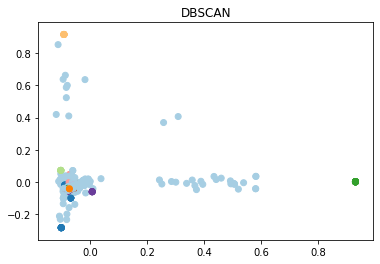

In [26]:
from sklearn.decomposition import PCA

def plot_dbscan(X , eps=0.001, min_samples=3):
    """Function to plot clusters"""
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    print(result.shape)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(result)
    y_pred = db.fit_predict(result)
    plt.scatter(result[:,0], result[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")
    
plot_dbscan( tfidf_dbscan().calc_tfidf(sentences_list, 0.01,300),0.001, 3)